# Data Science Final Project Assessment

## Project Title: Heart Disease Prediction Using Machine Learning

## Objective#### To develop a machine learning  model to predict the likelihood of heart disease in patients based on the given attributes in order to identify individuals at risk and enable early intervention and treatment.


In [204]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


## Task 1: Data Understanding and Preprocessing

### Load the dataset and perform an initial inspection

In [53]:
# Load the dataset into a dataframe, df, and view the first 5 rows
path = r"C:\Users\Ezeh Tetteh\Downloads\Final Assessment Dataset_heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [55]:
# View columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
# Shape of the dataset (rows, columns)
df.shape

(1025, 14)

In [59]:
# Statistical summary of all values in the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
# View datatypes of all columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [63]:
# A concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [65]:
# Check for duplicated rows
df.duplicated().sum()

723

In [67]:
#Remove the 723 duplicated rows permanently from the dataset for accurate model development and prediction.
df.drop_duplicates(inplace=True)

# Check again for duplicated rows
df.duplicated().sum()

0

In [69]:
df.shape

(302, 14)

### Handling missing values

In [72]:
# Check for missing values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no missing values in any column.

### Standardize continuous features

In [77]:
# Get list of continuous features 
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
print(continuous_features)

# To standardize continuous features
scaler = StandardScaler()

continuous_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ]  

df[continuous_features] = scaler.fit_transform(df[continuous_features])

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


#### The data is now clean.

### Create exploratory data visualizations 


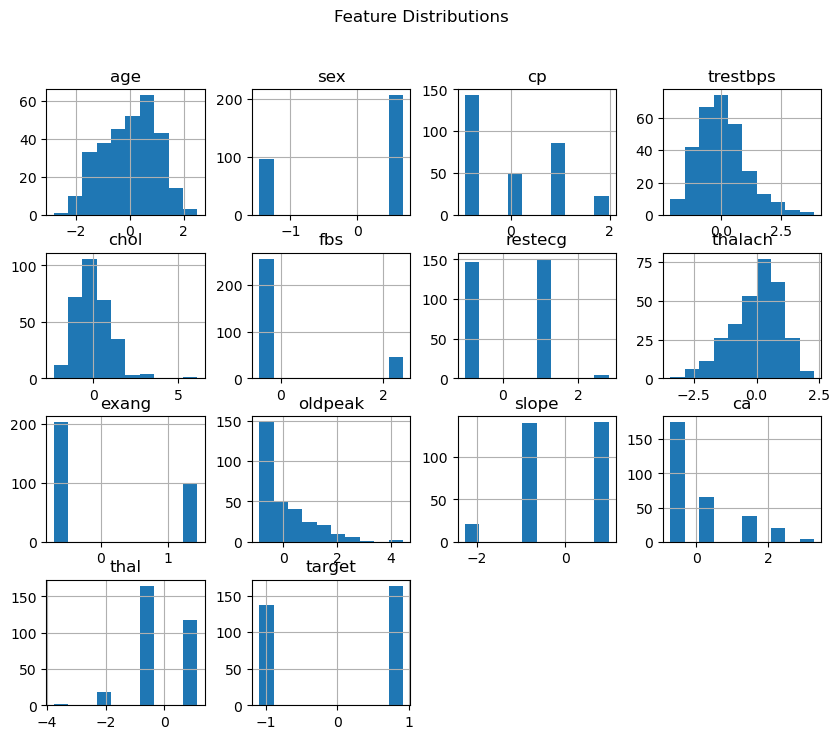

In [80]:
# Use exploratory data visualizations to better understand the distributions, correlations and relationships between the features

# Histograms for continuous features
df[continuous_features].hist(figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.show()

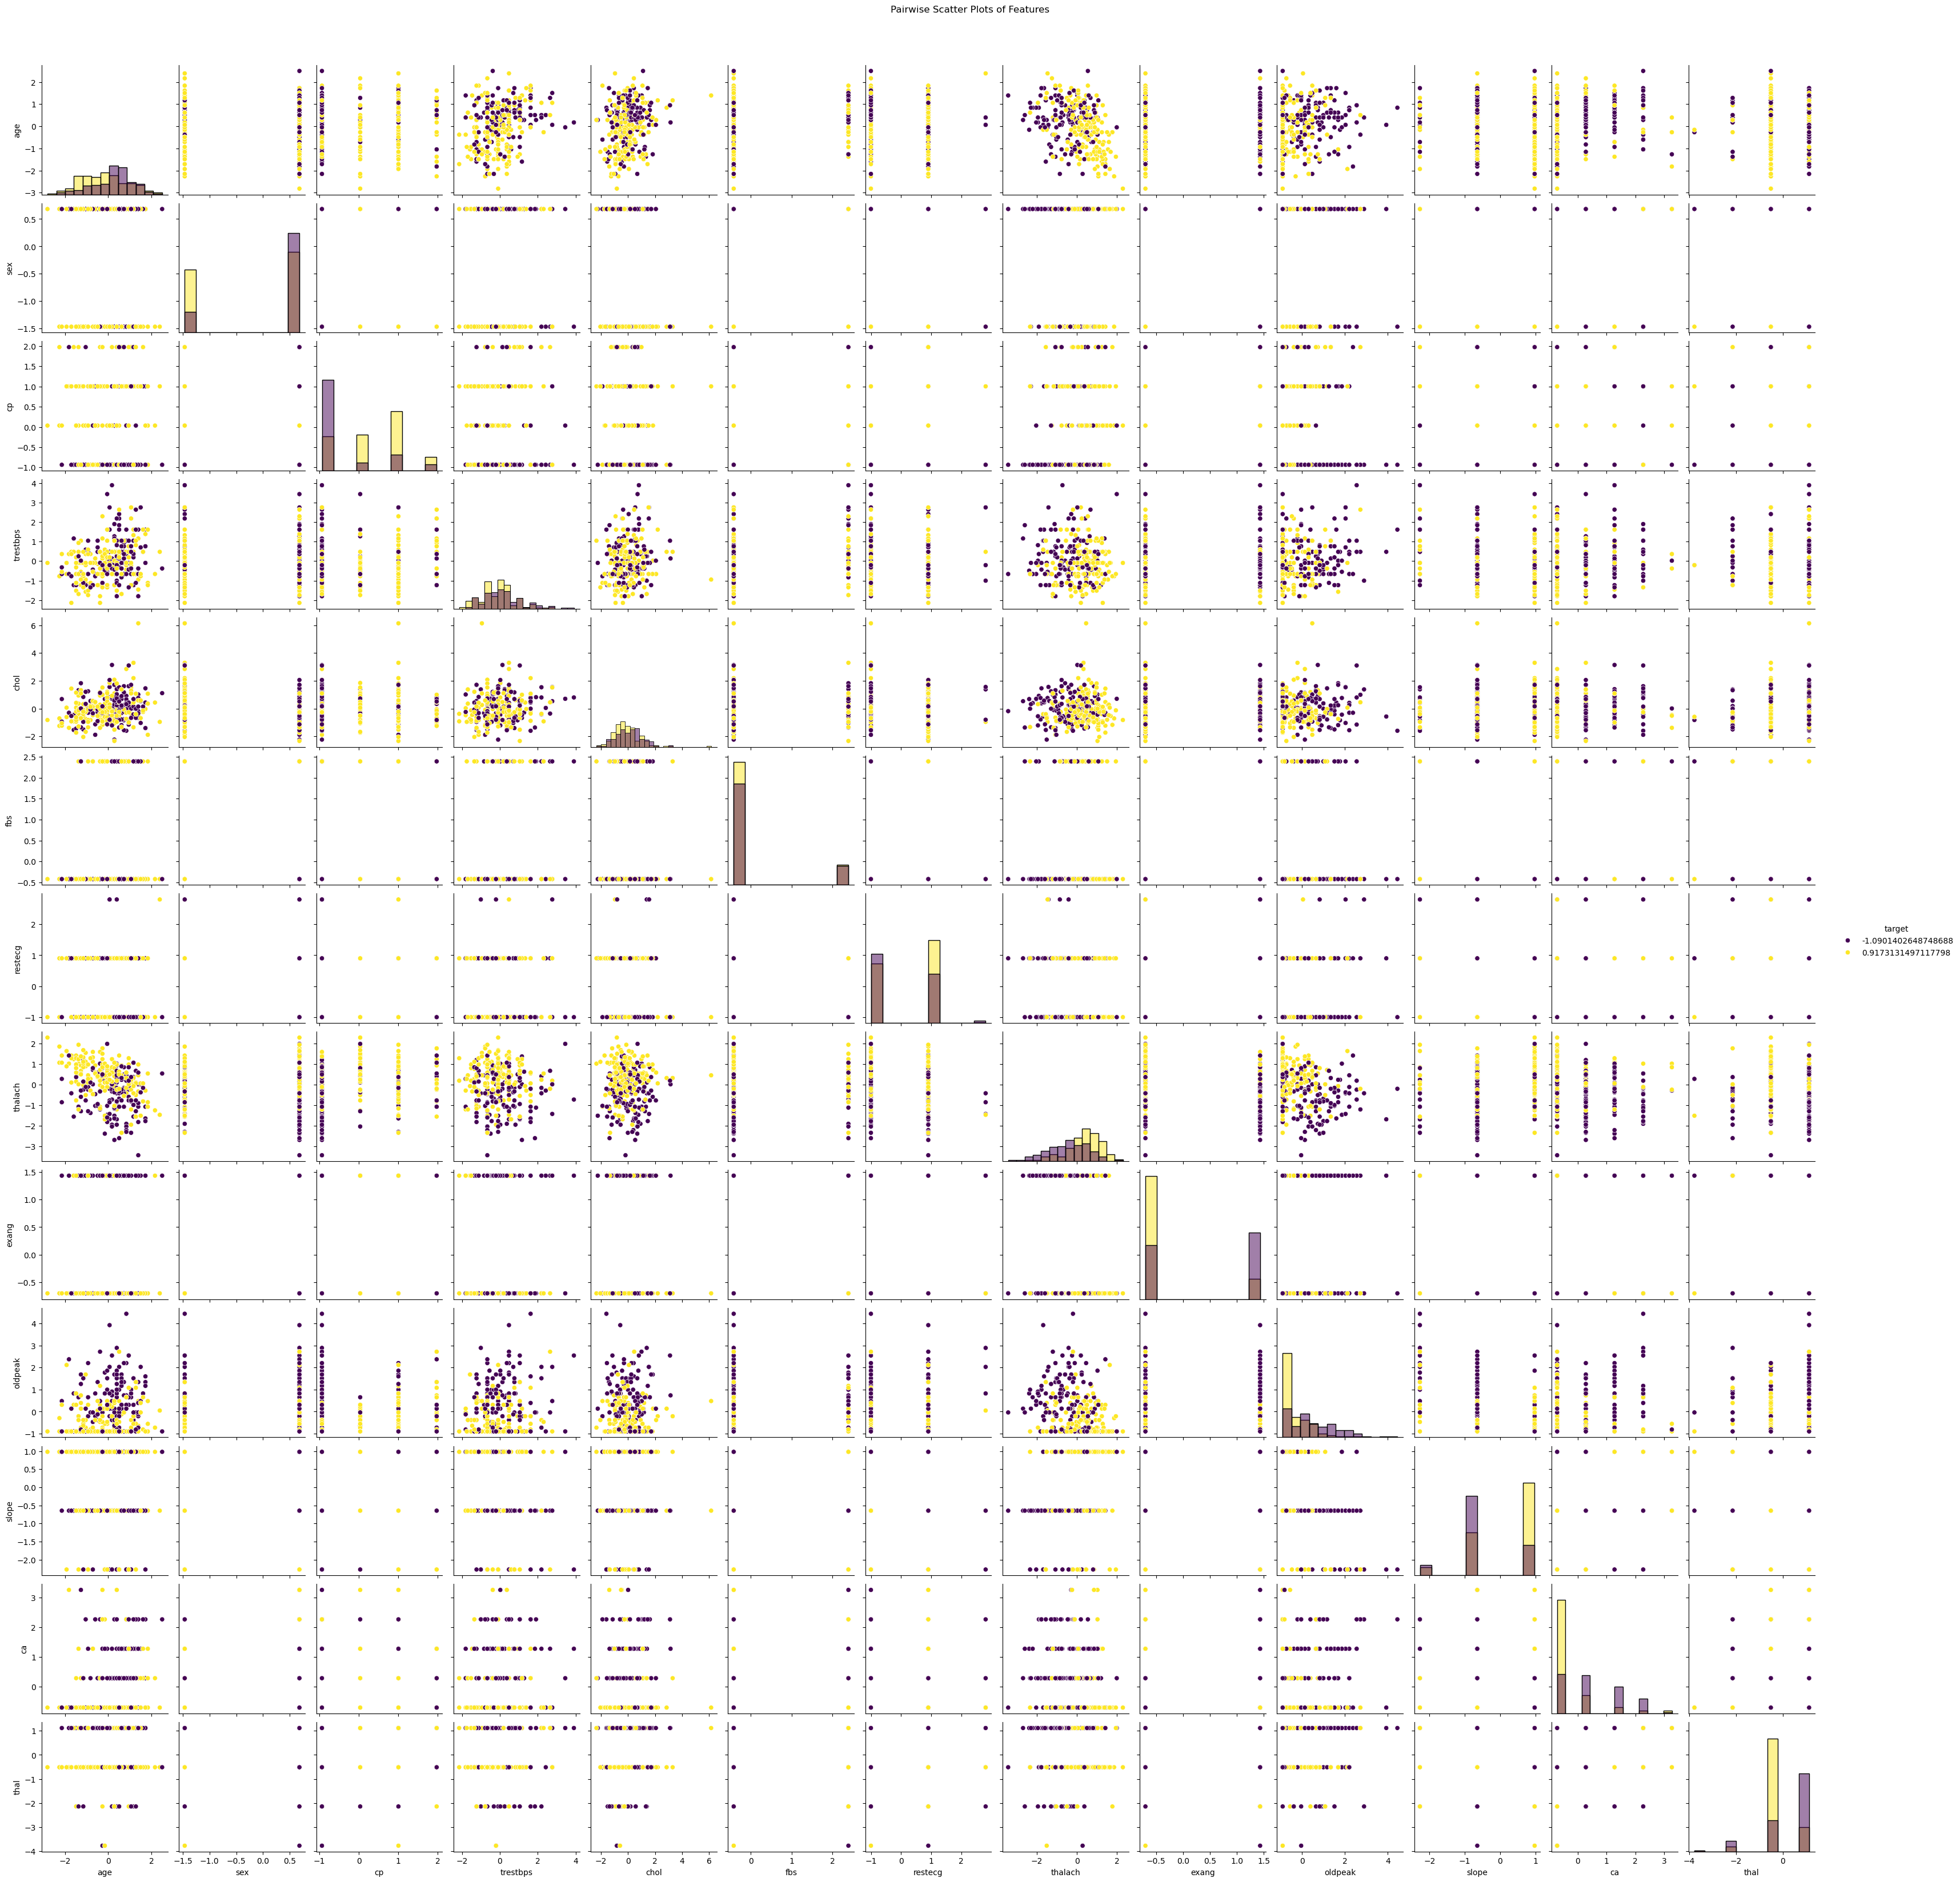

In [82]:
# Pairwise scatter plots; add hue if a target variable exists
sns.pairplot(df, hue='target', diag_kind='hist', palette='viridis')
plt.suptitle("Pairwise Scatter Plots of Features", y=1.02)
plt.show()

In [27]:
# Analyzing the target variable, 'target'.
# Count the occurrences of each class
target_counts = df['target'].value_counts()

print(target_counts)


# Calculate the percentage of each class
target_percent = df['target'].value_counts(normalize=True) * 100

print(target_percent)

target
 0.917313    164
-1.090140    138
Name: count, dtype: int64
target
 0.917313    54.304636
-1.090140    45.695364
Name: proportion, dtype: float64


#### Both 'target' class do not significantly outnumber the other. Hence the class is balanced.

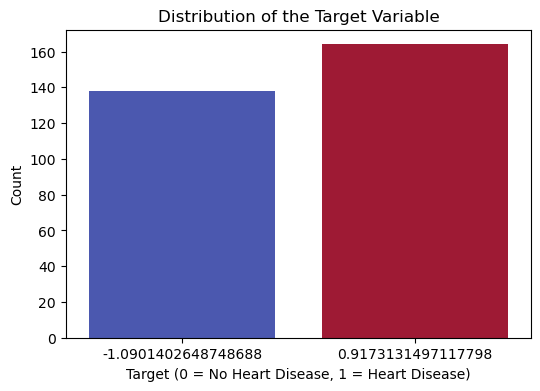

In [84]:
# Visualizing the target variable distribution using a bar plot.
# Bar plot for target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target', palette='coolwarm', legend=False)
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Count")
plt.title("Distribution of the Target Variable")
plt.show()

## Task 2: Feature Selection (using statistical methods like correlation analysis and the Chi-Squared test

### Use statistical methods to identify most relevant features


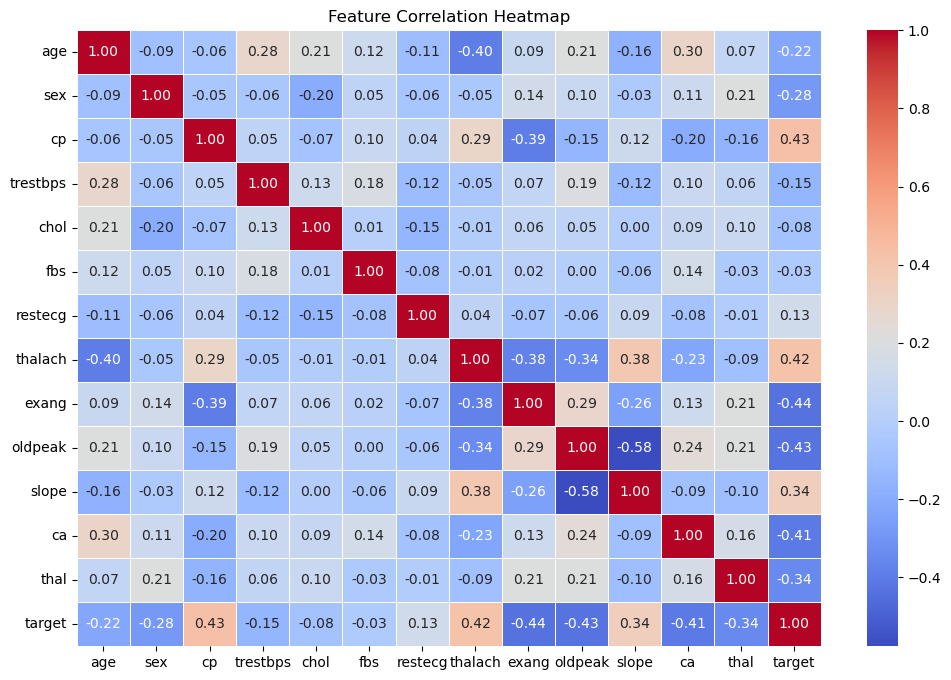

In [87]:
# Correlation Analysis using Pearson correlation to identify relationships between numerical features and the target variable.

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Key observations from the correlation matrix:
1. Strongly correlated features with target (High Predictive Power) include 'thalach', 'cp', 'slope'
These features are important indicators and should be kept in the model.

2. Negatively correlated features with target:
'exang' has strong negative correlation.
'oldpeak' has moderate negative correlation.
'ca' has moderate negative correlation.
These features are also important as they indicate risk factors for heart disease.

3. Weakly correlated features (Less Predictive Value):
'chol' has Very weak correlation with target
'fbs' Very weak correlation
'restecg'  → Low correlation
These features are not very useful so will be dropped to improve model efficiency.

4. 'sex', 'age', 'thal' and 'restbp' will be kept based on domain knowledge.

### Drop irrelevant features

In [95]:
# Drop irrelevant features and put in a dataframe.
new_df = df.drop(columns=['chol', 'fbs', 'restecg'])  

new_df.shape

(302, 11)

In [97]:
new_df.head()

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,0.682656,-0.935208,-0.376556,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967,-1.09014
1,-0.157260,0.682656,-0.935208,0.478910,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967,-1.09014
2,1.724733,0.682656,-0.935208,0.764066,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967,-1.09014
3,0.728383,0.682656,-0.935208,0.935159,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967,-1.09014
4,0.839089,-1.464866,-0.935208,0.364848,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994,-1.09014


## Task 3: Model Development

### Split the dataset into training and testing sets

In [102]:
# Define features (X) and target variable (y)
X = new_df.drop(columns=['target'])
y = new_df['target']

# Convert the target variable to integer.
y = y.astype(int)

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (241, 10)
Test set size: (61, 10)


### Standardizing the dataset

In [107]:
# Standardize the dataset. This step is important for models like Logistic Regression & SVM.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build and train different classification models: Logistic Regression, Random Forest and Decision Tree.
### - Logistic Regression

In [113]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = logreg_model.predict(X_test)

# Convert -1 to 1 (target variable (y) label encoding)
y_train = y_train.replace({-1: 1})
y_test = y_test.replace({-1: 1})

# Convert -1 to 1 (target variable (y) label encoding) 
y_pred_log_reg = np.where(y_pred_log_reg == -1, 1, y_pred_log_reg)

### Use appropriate performance metrics to evaluate logistic regression model

In [117]:
# Evaluate the logistic regression model.
accuracy_logreg = accuracy_score(y_test, y_pred_log_reg)
precision_logreg = precision_score(y_test, y_pred_log_reg)
recall_logreg = recall_score(y_test, y_pred_log_reg)
f1_logreg = f1_score(y_test, y_pred_log_reg)
roc_auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Print the results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print(f"ROC-AUC Score: {roc_auc_logreg:.4f}")

Logistic Regression Results:
Accuracy: 0.8033
Precision: 0.8333
Recall: 0.7812
F1-Score: 0.8065
ROC-AUC Score: 0.1315


### Visualize evaluation metrics for logistic regression model

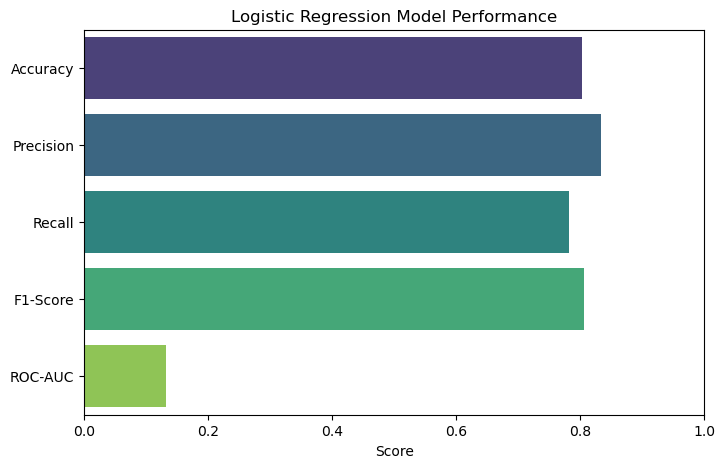

In [120]:
# To visualize evaluation metrics for logistic regression using a bar chart.

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
values = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]

plt.figure(figsize=(8, 5))
sns.barplot(x=values, y=metrics, hue=metrics, palette="viridis", legend=False)

plt.xlabel("Score")
plt.title("Logistic Regression Model Performance")
plt.xlim(0, 1)  # Metrics range from 0 to 1
plt.show()

### Inference:
### We can say that the logistic regression model is conservative in predicting positive cases. It seems to avoid false positives but may miss some true positives. This inference is because precision is greater than recall.
### A high F1-score suggests a good balance between precision and recall.
### ROC-AUC close to 1 indicates strong discrimination ability.

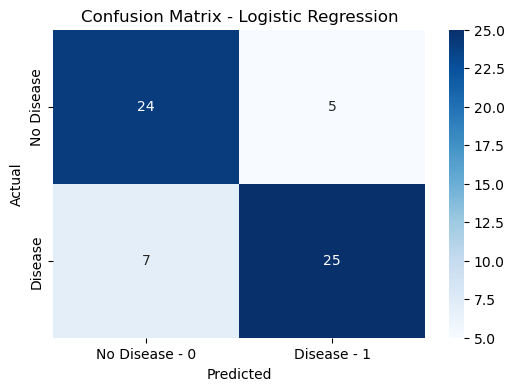

In [123]:
# Compute and visualize confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease - 0", "Disease - 1"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Inference:
### True Negatives: 24
### False Negatives: 7
### False Positives: 5
### True Positives: 25
### Since the  True Negatives and True Positives are higher, I can say that the model performed well.

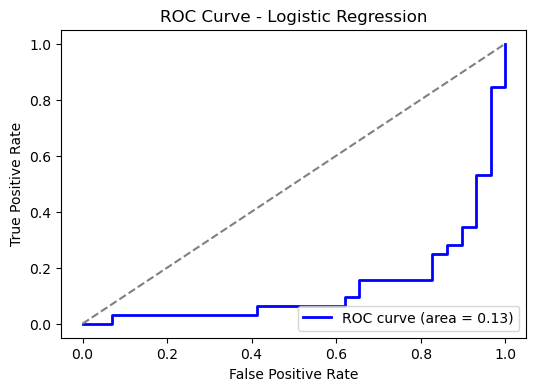

In [145]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

### Inference:
### With an AUC of 0.13, the model is making predictions in reverse, that is, it is more likely to classify positives as negatives and vice versa.
### This can be fixed by flipping the predictions so that the AUC becomes 0.87 (1-0.13). We would then have a strong model but with flipped labels.

### - Random Forest

In [179]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

### Use appropriate performance metrics to evaluate random forest model

In [181]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Print the results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Results:
Accuracy: 0.8361
Precision: 0.8929
Recall: 0.7812
F1-Score: 0.8333
ROC-AUC Score: 0.9230


### Visualize evaluation metrics for random forest model

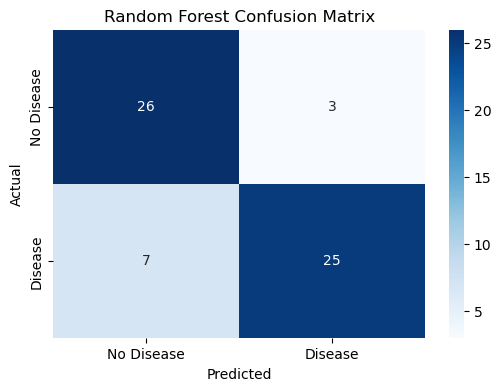

In [183]:
# Compute and visualize confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf , annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

### Inference:
### True Negatives: 26
### False Negatives: 7
### False Positives: 3
### True Positives: 25
### Since the  True Negatives and True Positives are higher, I can say that the model performed well.

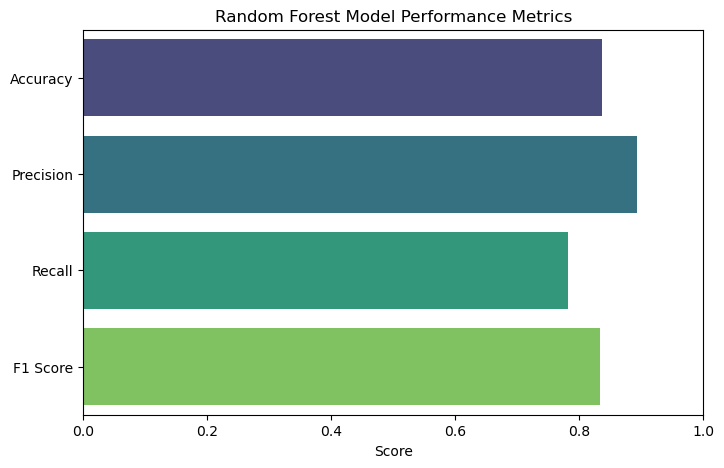

In [190]:
# Visualize Bar Chart of Classification Metrics

# Compute metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Create bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_rf, precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=values, y=metrics, hue=metrics, palette="viridis", legend=False)
plt.xlabel("Score")
plt.title("Random Forest Model Performance Metrics")
plt.xlim(0, 1)  # Set x-axis between 0 and 1
plt.show()

### Inference:
### Accuracy of 0.83 (83%) shows that for every 100 patients, about 83 are correctly diagnosed while 17 are misclassified using the random forest model.
### A high precision of 0.89 means fewer false positives.
### With a recall of 0.78, the model correctly identifies 78.12% of actual heart disease cases.
### A high F1-score of 0.8 indicates that the model effectively detects heart disease cases without over-predicting false positives.
### The evaluation metrics for the Random Forest model indicate strong performance in predicting heart disease.

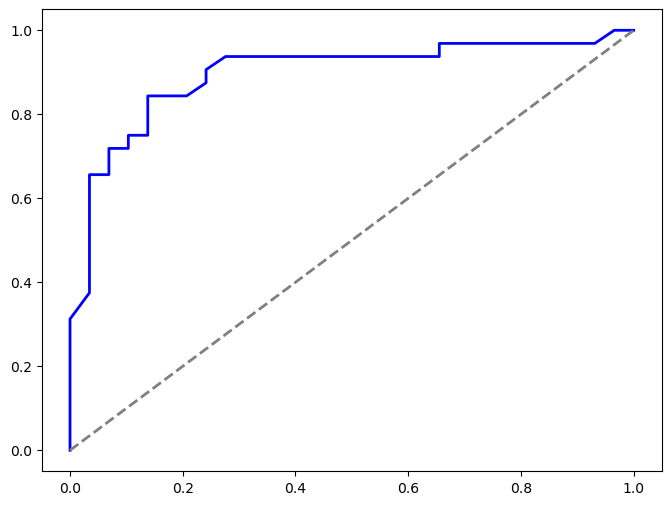

In [198]:
# Computr ROC Curve

# Compute predicted probabilities
y_proba_rf = rf_model.predict_proba(X_test)[:, 1] 

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Compute AUC score
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  

### Inference:
### This shows that the random forest model (AUC = 92.30%) is highly reliable in predicting heart diseases.

## Improve the Random Forest Model with Hyperparameter Tuning (GridSearchCV)

In [206]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [10, 20, 30, None],      # Depth of trees
    'min_samples_split': [2, 5, 10],      # Min samples to split
    'min_samples_leaf': [1, 2, 4],        # Min samples per leaf
    'max_features': ['sqrt', 'log2'],     # Feature selection strategy
    'bootstrap': [True, False]            # Whether to bootstrap
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the optimized model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Optimized Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Visualizing the Performance of the Improved Random Forest Model

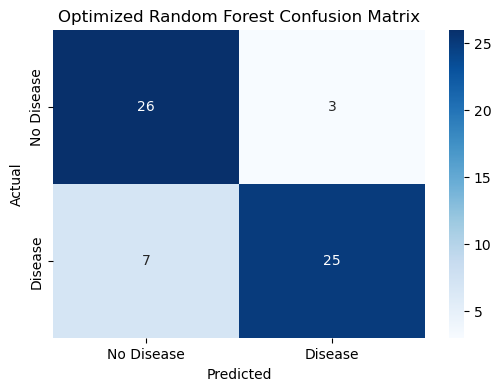

In [208]:
# Compute confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_rf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Random Forest Confusion Matrix")
plt.show()

### Inference:
### There was no significant change in the values.

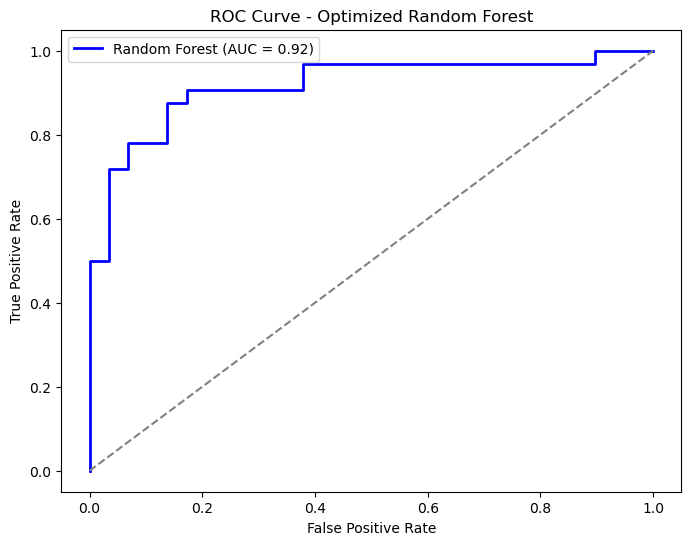

In [213]:
# Compute ROC curve
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_best_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized Random Forest")
plt.legend()
plt.show()

### Inference:
### The AUC value shows a high score implying better predictions.

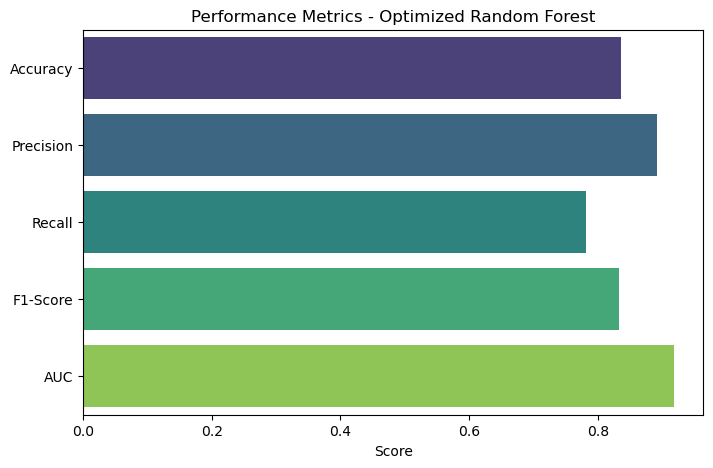

In [219]:
# Compute performance metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
values = [
    accuracy_score(y_test, y_pred_best_rf),
    precision_score(y_test, y_pred_best_rf),
    recall_score(y_test, y_pred_best_rf),
    f1_score(y_test, y_pred_best_rf),
    roc_auc_rf
]

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=values, y=metrics, hue=metrics, palette="viridis", legend=False)
plt.xlabel("Score")
plt.title("Performance Metrics - Optimized Random Forest")
plt.show()

### The optimized Random Forest model is accurate & robust

## Feature Importance in the Random Forest Model

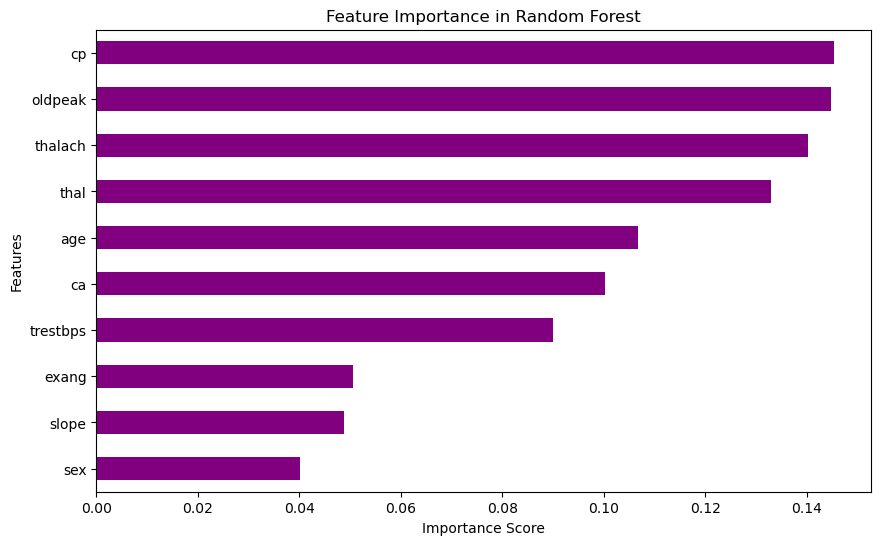

In [194]:
# Get feature importance
feature_importance = pd.Series(random_forest.feature_importances_, index=X.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=True).plot(kind="barh", color="purple")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

### This visualization identifies the most critical health indicators - 'cp', 'oldpeak', 'thalach', 'thal' and the least indicators of heart disease ('sex', 'slope')
### It also helps in improving model efficiency by reducing redundant feature and aids medical decision-making by highlighting key risk factors.


### - Decision Tree

In [232]:
# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train) 

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)
y_proba_dt = decision_tree.predict_proba(X_test)[:, 1]

### Use appropriate performance metrics to evaluate decision tree model

In [234]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

# Print the results
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Precision: {precision_dt:.2f}")
print(f"Decision Tree Recall: {recall_dt:.2f}")
print(f"Decision Tree F1-score: {f1_dt:.2f}")
print(f"Decision Tree ROC-AUC: {roc_auc_dt:.2f}")

Decision Tree Accuracy: 0.77
Decision Tree Precision: 0.80
Decision Tree Recall: 0.75
Decision Tree F1-score: 0.77
Decision Tree ROC-AUC: 0.78


### Visualize evaluation metrics for decision tree model

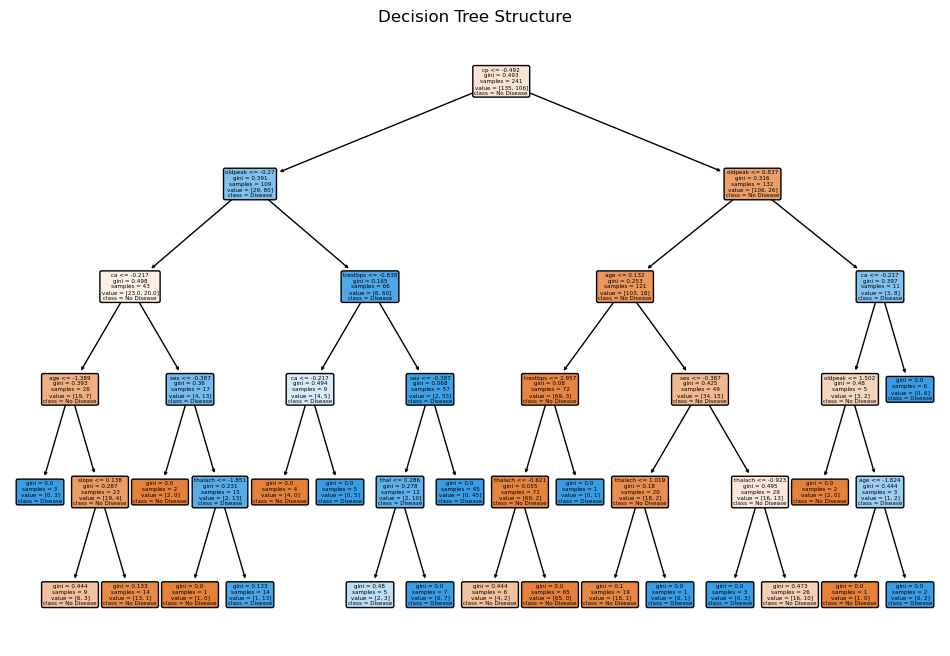

In [239]:
# To visualize evaluation the decision tree structure.

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

### The top node shows the most important feature ('cp')

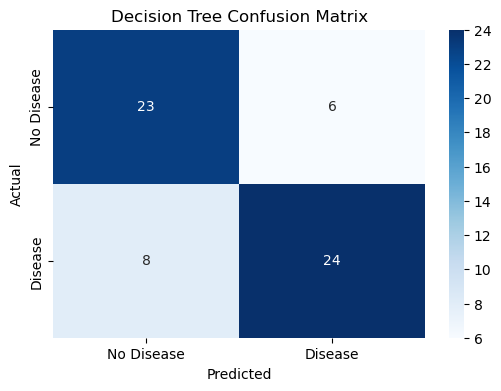

In [241]:
# Compute and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

### Inference:
### True Negatives: 23
### False Negatives: 8
### False Positives: 6
### True Positives: 24
### Since the  True Negatives and True Positives are higher, I can say that the model performed well.

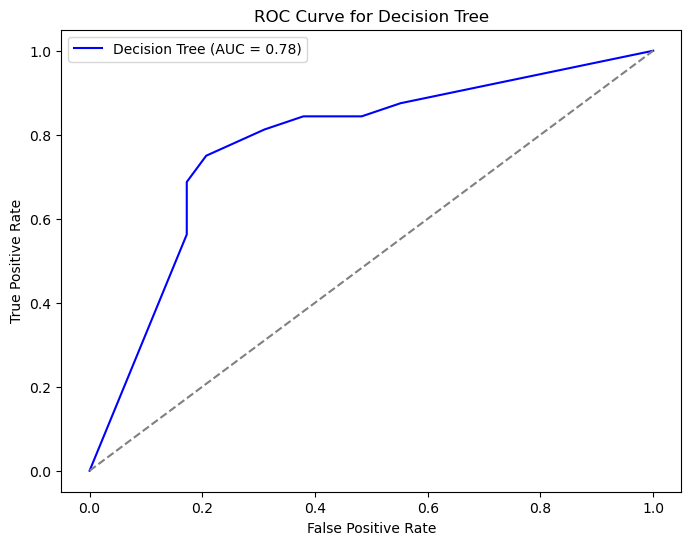

In [245]:
# Compute and visualize ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.show()

### Inference:
### This shows that the random forest model (AUC = 78%) is reliable in predicting heart diseases.

In [ ]:
Step 3: Compare Model Performance
You can now compare the results of the three models by looking at the metrics (Accuracy, Precision, Recall, F1-Score, and ROC-AUC Score) printed for each model. Here's an example of how to compare the results

### Comparing the Performances of the Models

In [249]:
# Create a dictionary to store the results
results = {
    "Logistic Regression": [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg],
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    "Decision Tree": [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]
}

# Create a DataFrame to display the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC Score']
results_df = pd.DataFrame(results, index=metrics)

# Display the comparison
print(results_df)

               Logistic Regression  Random Forest  Decision Tree
Accuracy                  0.803279       0.836066       0.770492
Precision                 0.833333       0.892857       0.800000
Recall                    0.781250       0.781250       0.750000
F1-Score                  0.806452       0.833333       0.774194
ROC-AUC Score             0.131466       0.918103       0.778017


### Visualize Performance of All Models Using a Bar Chart

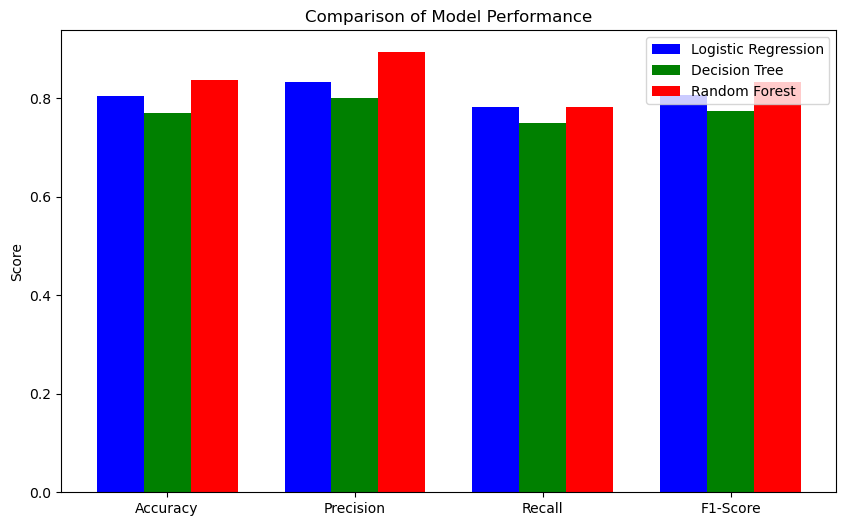

In [273]:
# Model Performance Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values_logreg = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]
values_dt = [accuracy_dt, precision_dt, recall_dt, f1_dt]
values_rf = [accuracy_rf, precision_rf, recall_rf, f1_rf]

# Create a bar plot
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, values_logreg, width, label="Logistic Regression", color='blue')
ax.bar(x, values_dt, width, label="Decision Tree", color='green')
ax.bar(x + width, values_rf, width, label="Random Forest", color='red')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance")
ax.legend()

plt.show()

### The bar chart shows that Random Forest model performed best in all metrics followed by Decision Tree and lastly Logistic Regression

### Visualize Performance of All Models Using a ROC Curve

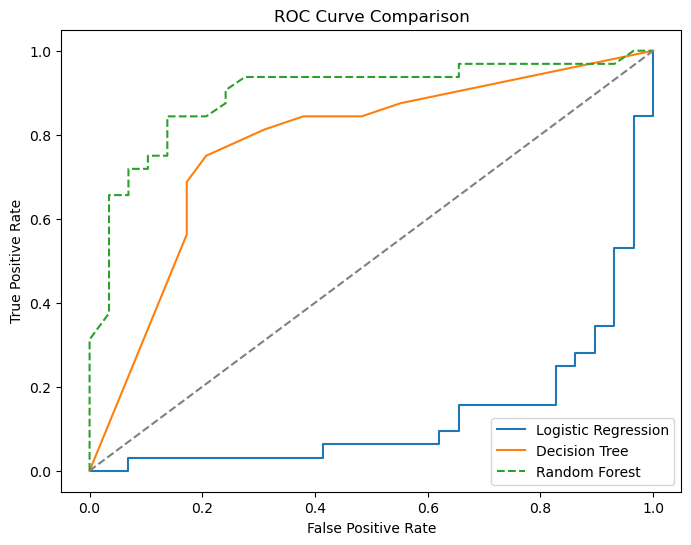

In [262]:
plt.figure(figsize=(8, 6))

# Compute ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Plot ROC curves
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest", linestyle="--")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### The higher the AUC score, the better the model at distinguishing between classes.
### Random Forest had the highest score followed by Decision Tree. Logistic Regression did not perform well.

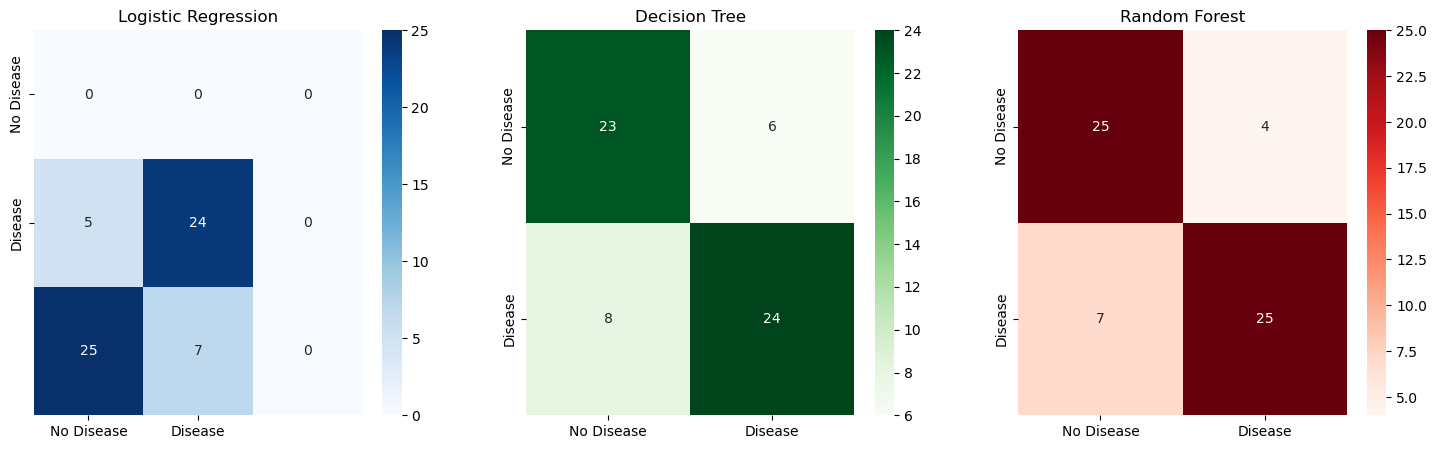

In [282]:
# Compute confusion matrices
conf_mat = confusion_matrix(y_test, y_pred_log_reg)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"], ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"], ax=axes[1])
axes[1].set_title("Decision Tree")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"], ax=axes[2])
axes[2].set_title("Random Forest")

plt.show()

### Random Forest performed best.

### In conclusion, Random Forest model is the best choice for heart disease prediction due to its high accuracy, recall, and robustness.
### The insights gained from feature importance can guide medical professionals in identifying the risk factiors in having a heart disease. 